In [1]:
%pprint

Pretty printing has been turned OFF


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
rng = np.random.default_rng(0)

In [4]:
newsdf = pd.read_csv('coocc_df_ALL.csv', index_col=0, wa).reset_index(drop=True)

/tmp/ipykernel_63811/1665368595.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [5]:
# just pennsylvania
allpenndf = newsdf.T.loc[newsdf.iloc[1]=="pennsylvania"].T

# newspaper article cooccurance

In [6]:
paperdf = allpenndf[0:2].T.reset_index().rename(columns={"index":"newspaper",0:"city",1:"state"})

In [7]:
paperdf

,newspaper,city,state
0,jewish exponent,philadelphia,pennsylvania
1,connellsville daily news,connellsville,pennsylvania
2,pottstown mercury,pottstown,pennsylvania
3,bedford inquirer,bedford,pennsylvania
4,altoona mirror,altoona,pennsylvania
5,lock haven express,lock haven,pennsylvania
6,titusville herald,titusville,pennsylvania
7,indiana evening gazette,indiana,pennsylvania
8,williamsport sun-gazette,williamsport,pennsylvania
9,monessen daily independent,monessen,pennsylvania


In [8]:
datadf = allpenndf[2:].astype(int)
datadf.sample(3)

,jewish exponent,connellsville daily news,pottstown mercury,bedford inquirer,altoona mirror,lock haven express,titusville herald,indiana evening gazette,williamsport sun-gazette,monessen daily independent,...,bedford gazette,tyrone daily herald,oil city derrick,towanda daily review,wellsboro gazette,warren times-mirror and observer,doylestown daily intelligencer,evening standard,bradford era,wayne independent
120221,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
116600,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49499,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [9]:
# let's drop newspapers with < 100 articles
datadf = datadf.loc[:, datadf.sum() > 100]

In [10]:
# let's also drop newspapers in the same municipality
paperdf[paperdf.newspaper.isin(datadf.columns)].value_counts("city")

city
warren           2
uniontown        2
altoona          1
lebanon          1
tyrone           1
towanda          1
titusville       1
somerset         1
pottstown        1
oil city         1
new castle       1
monessen         1
lock haven       1
kittanning       1
bedford          1
indiana          1
huntingdon       1
honesdale        1
hanover          1
greenville       1
gettysburg       1
dubois           1
doylestown       1
connellsville    1
clearfield       1
bradford         1
williamsport     1
Name: count, dtype: int64

In [11]:
paperdf[paperdf.newspaper.isin(datadf.columns)].loc[paperdf.city=="uniontown"]

,newspaper,city,state
12,morning herald.1,uniontown,pennsylvania
33,evening standard,uniontown,pennsylvania


In [12]:
paperdf[paperdf.newspaper.isin(datadf.columns)].loc[paperdf.city=="warren"]

,newspaper,city,state
17,warren times observer,warren,pennsylvania
31,warren times-mirror and observer,warren,pennsylvania


In [13]:
datadf.loc[:,["morning herald.1","evening standard"]].sum()
# drop morning herald

morning herald.1    1258
evening standard    2969
dtype: int64

In [14]:
datadf.loc[:,["warren times observer","warren times-mirror and observer"]].sum()
# drop mirror and observer
# my guess is actually that they merged with another paper

warren times observer               3219
warren times-mirror and observer     203
dtype: int64

In [15]:
datadf = datadf.drop("morning herald.1", axis=1)
datadf = datadf.drop("warren times-mirror and observer", axis=1)

In [16]:
corr = datadf.corr()

# map pennsylvania

In [17]:
muni_boundaries = gpd.read_file('maps/PaMunicipalities2024_11/PaMunicipalities2024_11.shp')
county_boundaries = gpd.read_file('maps/PaCounty2024_11/PaCounty2024_11.shp')

In [18]:
muni_boundaries.sample(3)

,MSLINK,COUNTY,MUNICIPAL_,MUNICIPAL1,FIPS_MUN_C,FED_AID_UR,FIPS_COUNT,FIPS_AREA_,FIPS_AREA1,FIPS_SQ_MI,...,PSD_CODE_2,PSD_CODE_3,GIS_UPDATE,GIS_GEOMET,GPID,AREA,LEN,Shape_Leng,Shape_Area,geometry
2240,2205,02,111,NORTH VERSAILLES,55488,4,003,00009,PITTSBURGH,8.4,...,None,None,0000/00/00,0000/00/00,69892,0.0,0.0,46551.528237,3.680731e+07,"POLYGON ((-8888495.111 4923307.735, -8888486.2..."
2237,239,52,210,HECTOR,33568,1,105,00000,None,41.5,...,530405,None,0000/00/00,0000/00/00,69698,0.0,0.0,55475.061732,1.920611e+08,"POLYGON ((-8652502.812 5148001.338, -8639234.5..."
1174,652,40,401,ASHLEY,03272,4,079,00281,SCRAN/WLKS-BARRE,0.9,...,None,None,0000/00/00,0000/00/00,71414,0.0,0.0,8582.942443,4.236885e+06,"POLYGON ((-8450412.262 5043470.366, -8450419.9..."


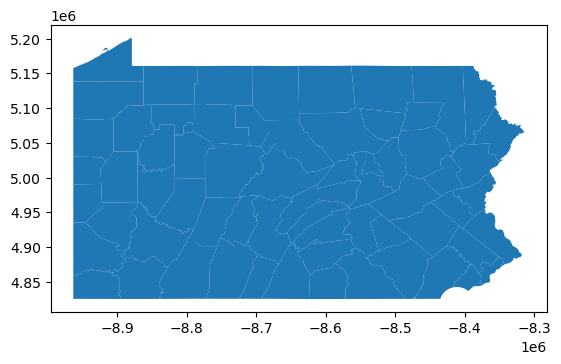

In [19]:
county_boundaries.plot()
plt.show()

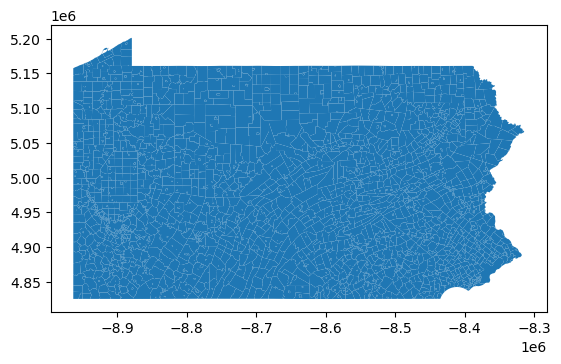

In [20]:
muni_boundaries.plot()
plt.show()

# newspaper data 
what municipalities are the newspapers located in?

In [21]:
final_paperdf = paperdf[paperdf.newspaper.isin(datadf.columns)]
final_paperdf["muni_caps"] = final_paperdf.city.map(str.upper)

/tmp/ipykernel_63811/1875822261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_paperdf["muni_caps"] = final_paperdf.city.map(str.upper)


In [22]:
munis_to_map = muni_boundaries.loc[muni_boundaries.MUNICIPAL1.isin(final_paperdf.muni_caps)].drop_duplicates('MUNICIPAL1')

In [23]:
# add distinct colors for each muni
munis_to_map["muni_color"] = [
    "#2f4f4f",
    "#006400",
    "#808000",
    "#483d8b",
    "#b22222",
    "#3cb371",
    "#cd853f",
    "#4682b4",
    "#9acd32",
    "#00008b",
    "#8b008b",
    "#b03060",
    "#ff0000",
    "#ffa500",
    "#ffff00",
    "#7fff00",
    "#8a2be2",
    "#00ff7f",
    "#00ffff",
    "#0000ff",
    "#ff00ff",
    "#1e90ff",
    "#add8e6",
    "#ff1493",
    "#ee82ee",
    "#ffdead",
    "#ffb6c1"
]

In [24]:
munis_to_map = munis_to_map.set_index('MUNICIPAL1').join(final_paperdf.set_index('muni_caps')).reset_index()

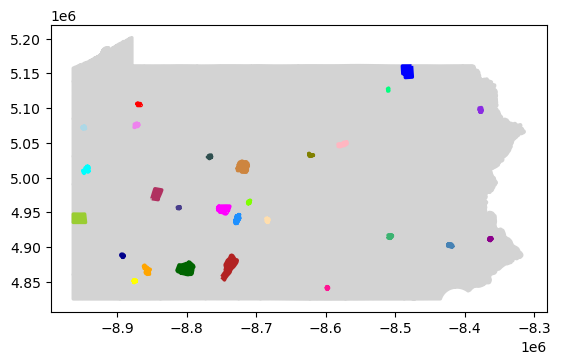

In [25]:
fig, ax = plt.subplots()
county_boundaries.plot(
    ax=ax,
    color="lightgray",
    # add the same outline as below
    edgecolor="lightgray",
    linewidth = 2.5
)
munis_to_map.plot(
    ax=ax, 
    color=munis_to_map.muni_color,
    # add outlines so u can actually see where the municipalities are
    edgecolor=munis_to_map.muni_color,
    linewidth = 2.5
)
plt.show()

In [26]:
# get the middle of the municipalities for making lines
munis_to_map["point"] = munis_to_map.geometry.centroid

In [27]:
corr.max()

connellsville daily news          1.0
pottstown mercury                 1.0
altoona mirror                    1.0
lock haven express                1.0
titusville herald                 1.0
indiana evening gazette           1.0
williamsport sun-gazette          1.0
monessen daily independent        1.0
lebanon daily news                1.0
evening sun                       1.0
new castle news                   1.0
somerset daily american           1.0
greenville record-argus           1.0
warren times observer             1.0
kittanning times                  1.0
dubois courier express            1.0
daily news                        1.0
clearfield progress               1.0
gettysburg times                  1.0
bedford gazette                   1.0
tyrone daily herald               1.0
oil city derrick                  1.0
towanda daily review              1.0
doylestown daily intelligencer    1.0
evening standard                  1.0
bradford era                      1.0
wayne indepe

In [57]:
# to get reasonable line thicknesses
# i will rescale the correlations
# i need the min and max to do that
all_corrs = []
for i, m in enumerate(munis_to_map.newspaper):
    for n in munis_to_map.newspaper[i:]:
        if m!=n:
            all_corrs.append(corr[m][n])

In [58]:
corr_min = np.min(all_corrs)
corr_max = np.max(all_corrs)

In [84]:
def rescale_corr01(c):
    # scale to between 0 and 1
    return np.round(((c - corr_min) / (corr_max - corr_min)), 1)

In [115]:
def rescale_corr03(c):
    # scale to between 0 and 3
    return np.round(((c - corr_min) / (corr_max - corr_min) * 3), 1)

In [116]:
munis_to_map[munis_to_map.newspaper=="bradford era"].geometry.values.centroid

<GeometryArray>
[<POINT (-8718992.466 5015457.761)>]
Length: 1, dtype: geometry

# drawing lines

In [145]:
from shapely.geometry import LineString
from matplotlib.colors import to_rgb
import matplotlib.patches as mpatches

In [146]:
pair_lines = []
pair_alpha = []
pair_weights = []
color1 = []
color2 = []
cmapl = []
for i, m in enumerate(munis_to_map.newspaper):
    m_point = munis_to_map[munis_to_map.newspaper==m].geometry.values[0].centroid
    line_color1 = munis_to_map[munis_to_map.newspaper==m].muni_color.values[0]
    for n in munis_to_map.newspaper[i:]:
        if m!=n:
            n_point = munis_to_map[munis_to_map.newspaper==n].geometry.values[0].centroid
            line_color2 = munis_to_map[munis_to_map.newspaper==n].muni_color.values[0]
            pair_lines.append(LineString([m_point,n_point]))
            pair_alpha.append(rescale_corr01(corr[m][n]))
            pair_weights.append(rescale_corr03(corr[m][n]))
            color1.append(to_rgb(line_color1))
            color2.append(to_rgb(line_color2))

In [147]:
line_df = gpd.GeoDataFrame({'geometry':pair_lines})
line_df["pair_weights"]=pair_weights
line_df["pair_alpha"]=pair_alpha
line_df["line_color1"]=color1
line_df["line_color2"]=color2

In [148]:
line_df.head(3)

,geometry,pair_weights,pair_alpha,line_color1,line_color2
0,"LINESTRING (-8767101.968 5030446.869, -8801110...",0.6,0.2,"(0.1843137254901961, 0.30980392156862746, 0.30...","(0.0, 0.39215686274509803, 0.0)"
1,"LINESTRING (-8767101.968 5030446.869, -8621892...",1.8,0.6,"(0.1843137254901961, 0.30980392156862746, 0.30...","(0.5019607843137255, 0.5019607843137255, 0.0)"
2,"LINESTRING (-8767101.968 5030446.869, -8811504...",2.2,0.7,"(0.1843137254901961, 0.30980392156862746, 0.30...","(0.2823529411764706, 0.23921568627450981, 0.54..."


In [192]:
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Atkinson Hyperlegible']

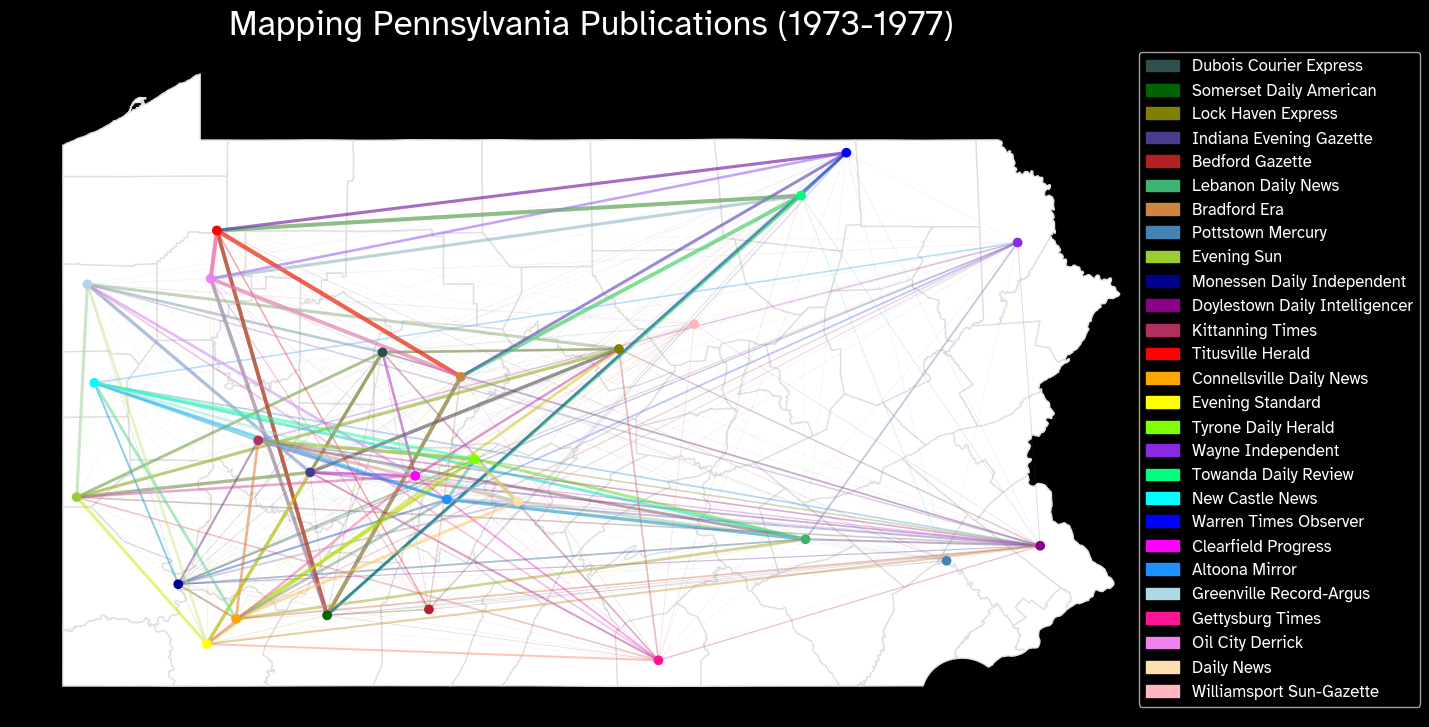

In [217]:
fig, ax = plt.subplots(figsize=(15,15))
plt.style.use("dark_background")
ax.axis("off")
plt.title("Mapping Pennsylvania Publications (1973-1977)",size=25)

# plot PA
county_boundaries.plot(
    ax=ax,
    color="white",
    # make county borders unobtrusive
    edgecolor="#e0e0e0"
)

# the municipalities are too weird shaped so i'm just plotting the center point

# munis_to_map.plot(
#     ax=ax, 
#     color=munis_to_map.muni_color,
#     # add outlines so u can actually see where the municipalities are
#     edgecolor=munis_to_map.muni_color,
#     linewidth = 2.5,
#     zorder=2
# )

# plot center points
gpd.GeoDataFrame({'geometry':munis_to_map.point}).plot(
    ax=ax,
    color=munis_to_map.muni_color,
    zorder=2
)

# plot lines
line_df.plot(
    ax=ax,
    color=line_df.line_color1,
    alpha=line_df.pair_alpha/2,
    linewidth = line_df.pair_weights,
    zorder=1
)

# color blending for dummies
line_df.plot(
    ax=ax,
    color=line_df.line_color2,
    alpha=line_df.pair_alpha/2,
    linewidth = line_df.pair_weights,
    zorder=1
)
# make legend manually bc matplotlib is annoying
all_patches = []
for i, r in munis_to_map.iterrows():
    all_patches.append(mpatches.Patch(color=r.muni_color, label=r.newspaper.title()))
plt.legend(handles=all_patches, fontsize=12, bbox_to_anchor=(1.22, 1), bbox_transform=ax.transAxes)

#plt.show()
plt.savefig("final_figure.png",bbox_inches="tight")